In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [4]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

In [5]:
crime = pd.read_csv("./datasets/crime.csv")
vidya = pd.read_csv("./datasets/vgsales.csv")

In [6]:
crime.head()

,Year,population,Violent crime,Property crime,Murder and non-negligent man-slaughter,Forcible rape,Robbery,Aggravated assault,Burglary,Larceny-theft,Motor vehicle theft
0,1981,229465714,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1,1982,231664458,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
2,1983,233791994,1258087,10850543,19308,78918,506567,653294,3129851,6712759,1007933
3,1984,235824902,1273282,10608473,18692,84233,485008,685349,2984434,6591874,1032165
4,1985,237923795,1327767,11102590,18976,87671,497874,723246,3073348,6926380,1102862


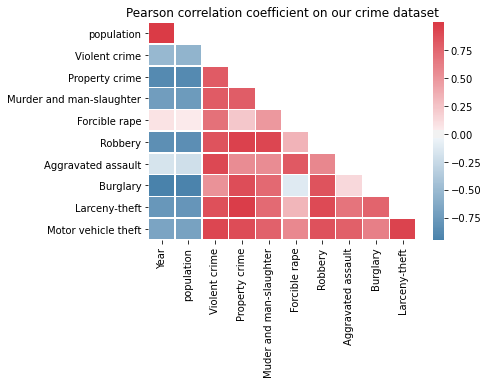

In [27]:
corr = crime.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = corr.rename({"Murder and non-negligent man-slaughter": "Murder and man-slaughter"})
cmap = sns.diverging_palette(240, 10, as_cmap=True) # Colors

mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()

fig, ax =plt.subplots()
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap, center=0)
plt.title("Pearson correlation coefficient on our crime dataset")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = "Muder and man-slaughter"
ax.set_xticklabels(labels)
plt.show()

In [7]:
vidya.sort_values(by=["Year"]).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


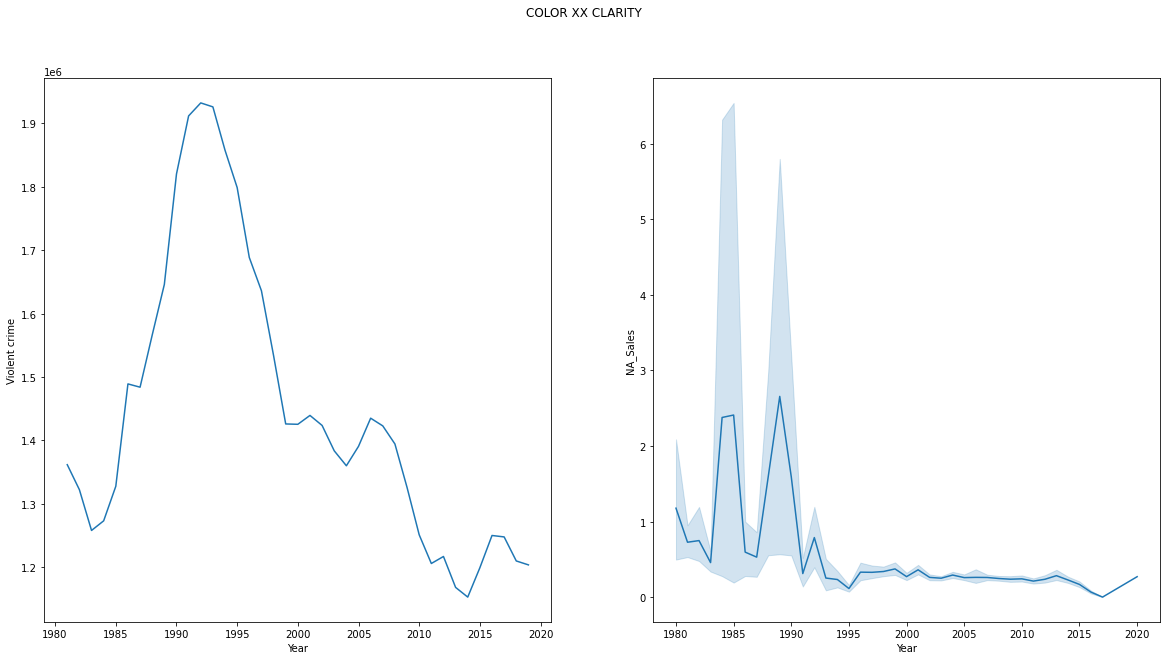

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10), sharex=False)
fig.suptitle('COLOR XX CLARITY')
sns.lineplot(x="Year", y="Violent crime",
             data=crime, ax=ax1)
sns.lineplot(x="Year", y="NA_Sales",
             data=vidya, ax=ax2)
plt.show()

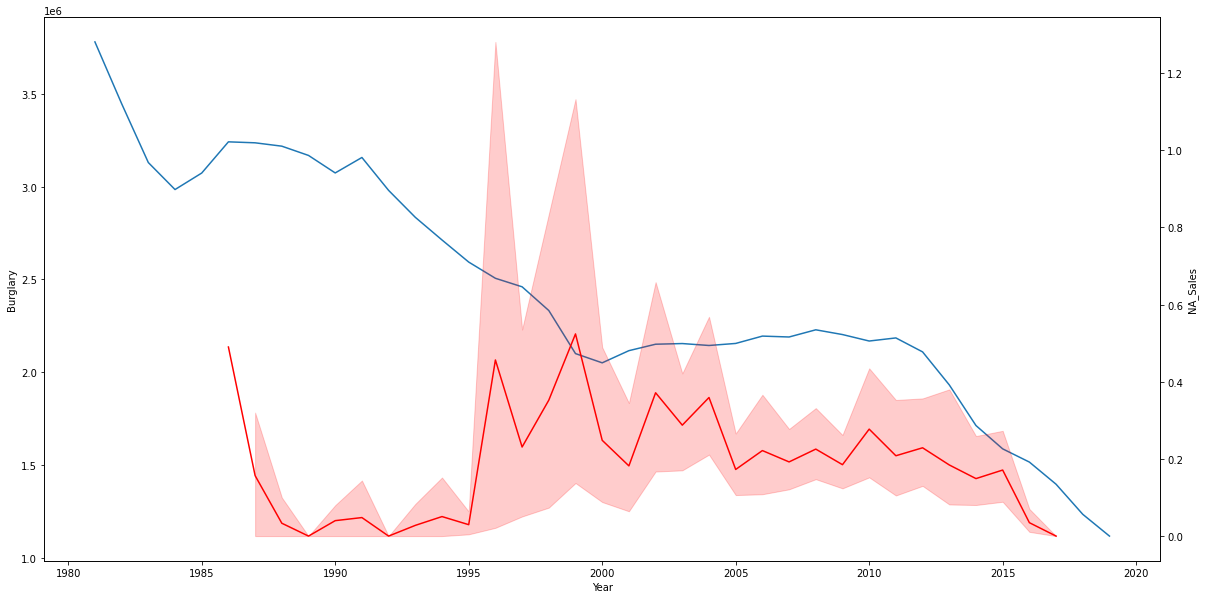

In [9]:
fig2, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="Year", y="Burglary",
             data=crime, ax = ax)
vidya_discrim = vidya.where(vidya["Genre"] == "Role-Playing")
axx = ax.twinx()
sns.lineplot(x="Year", y="NA_Sales", color="red",
             data=vidya_discrim, ax = axx)
plt.show()